In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
df = pd.read_csv('Levels_Fyi_Salary_Data.csv')
print(df)

                timestamp     company     level                         title  \
0       6/7/2017 11:33:27      Oracle        L3               Product Manager   
1      6/10/2017 17:11:29        eBay      SE 2             Software Engineer   
2      6/11/2017 14:53:57      Amazon        L7               Product Manager   
3       6/17/2017 0:23:14       Apple        M1  Software Engineering Manager   
4      6/20/2017 10:58:51   Microsoft        60             Software Engineer   
...                   ...         ...       ...                           ...   
62637   9/9/2018 11:52:32      Google        T4             Software Engineer   
62638   9/13/2018 8:23:32   Microsoft        62             Software Engineer   
62639  9/13/2018 14:35:59        MSFT        63             Software Engineer   
62640  9/16/2018 16:10:35  Salesforce  Lead MTS             Software Engineer   
62641   1/29/2019 5:12:59       apple      ict3             Software Engineer   

       totalyearlycompensat

In [74]:
print(df.columns)

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')


In [75]:
salary_df = df[['company', 'totalyearlycompensation', 'yearsofexperience', 'yearsatcompany', 'basesalary']]
print(salary_df)

          company  totalyearlycompensation  yearsofexperience  yearsatcompany  \
0          Oracle                   127000                1.5             1.5   
1            eBay                   100000                5.0             3.0   
2          Amazon                   310000                8.0             0.0   
3           Apple                   372000                7.0             5.0   
4       Microsoft                   157000                5.0             3.0   
...           ...                      ...                ...             ...   
62637      Google                   327000               10.0             1.0   
62638   Microsoft                   237000                2.0             2.0   
62639        MSFT                   220000               14.0            12.0   
62640  Salesforce                   280000                8.0             4.0   
62641       apple                   200000                0.0             0.0   

       basesalary  
0      

In [76]:
X = salary_df.iloc[:, 2:]
y_train = salary_df.iloc[:50000, 1]
y_test = salary_df.iloc[50000:, 1]

rows = X.shape[0]
count = 0
N_train = 50000

train_err = {}
test_err = {}


In [77]:
def rmse(targets, predictions):
    return np.sqrt((np.square(predictions - targets)).mean())

In [79]:

for i in range(1,6):
    A = np.ones([rows, (3*i)+1])
    print(A.shape)
    for j in range(0,3):
        for k in range(1, i+1):
            A[:,count]=np.power(np.array(X.iloc[:,j]).T, k)
            count = count+1

    #spliting x values for test and train

    print("A[1]: \n")
    print(A[1])
    x_train = A[0:N_train, :]
    x_test = A[N_train:, :]

    print("X_train.shape: \n")
    print(x_train.shape)
    w = np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T.dot(y_train))

    #training error
    y_train_pred = x_train.dot(w)
    rms_train = rmse(y_train, y_train_pred)
    train_err[i] = rms_train
    print("rms_train \n")
    print(rms_train)

    #test error
    y_test_pred = x_test.dot(w)
    rms_test = rmse(y_test, y_test_pred)
    print("rms_test \n")
    print(rms_test)
    test_err[i] = rms_test

    count = 0


(62642, 4)
A[1]: 

[5. 3. 0. 1.]
X_train.shape: 

(50000, 4)
rms_train 

92469.43809773953
rms_test 

121382.52351504721
(62642, 7)
A[1]: 

[ 5. 25.  3.  9.  0.  0.  1.]
X_train.shape: 

(50000, 7)
rms_train 

91573.99026037067
rms_test 

129644.37305767815
(62642, 10)
A[1]: 

[  5.  25. 125.   3.   9.  27.   0.   0.   0.   1.]
X_train.shape: 

(50000, 10)
rms_train 

82679.30803704014
rms_test 

450246.99729011394
(62642, 13)
A[1]: 

[  5.  25. 125. 625.   3.   9.  27.  81.   0.   0.   0.   0.   1.]
X_train.shape: 

(50000, 13)
rms_train 

76200.1825509773
rms_test 

1486057.6706244342
(62642, 16)
A[1]: 

[5.000e+00 2.500e+01 1.250e+02 6.250e+02 3.125e+03 3.000e+00 9.000e+00
 2.700e+01 8.100e+01 2.430e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 1.000e+00]
X_train.shape: 

(50000, 16)
rms_train 

75412.29147140734
rms_test 

1535500.4793869003


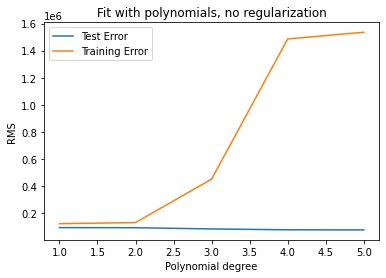

In [80]:
plt.plot(list(train_err.keys()), list(train_err.values()))
plt.plot(list(test_err.keys()), list(test_err.values()))
plt.ylabel('RMS')
plt.legend(['Test Error', 'Training Error'])
plt.title('Fit with polynomials, no regularization')
plt.xlabel('Polynomial degree')
plt.show()